# Задание 1

---

Напишите программу, которая будет решать систему линейных уравнений вида:

\begin{matrix} a_{11}x+a_{12}y=b_{1}&(1) \\ a_{21}x+a_{22}y=b_{2} &(2) \end{matrix}
​	
На вход программа должна принимать 2 строки.

Каждая строка содержит 3 действительных числа через пробел: коэффициенты a и b.

На выходе программа должна выдавать значения x и y в одну строку через пробел.
 

Примечание 1. Для разделения строки на отдельные элементы используйте функцию split()

Примечание 2. В качестве разделителя между целой и дробной частью используйте точку, например 0.2

In [ ]:
import numpy as np

In [ ]:
inForA = np.array(input("Введите коэффициенты (3шт) через запятую\n").split(" ")).astype(float)
inForB = np.array(input("Введите коэффициенты (3шт) через запятую\n").split(" ")).astype(float)



a = np.array([ inForA[0:2], inForB[0:2] ])
b = np.array([ inForA[2], inForB[2] ])

np.linalg.solve(a, b)

Введите коэффициенты (3шт) через запятую
1,2,3
Введите коэффициенты (3шт) через запятую
3,2,1


array([-1.,  2.])

# Задание 2

Напишите функцию `decorate_matrix`, которая получает на вход одно целое число больше единицы. Функция должна возвращать матрицу n на n, у которой на границах стоят единицы, а на всех остальных позициях(если остались позиции не на границах) стоят нули.

```
# ожидаемый резальтат для аргумента 5
array([[1., 1., 1., 1., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 1., 1., 1., 1.]])
```



In [ ]:



def decorate_matrix(n):
  if n > 1:
    a = np.zeros(shape=(n, n), dtype=int)
    a[:,0] = 1
    a[:,n-1] = 1
    a[0,:] = 1
    a[n-1,:] = 1
    return a

print(decorate_matrix(10))

[[1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1]]


# Задание 3

1) реализуйте 2 функции:

$f(x) = (x+a)^2 - b$ 

$g(x) = |f(x)|$

2) Найдите аргументы, при которых достигается минимум функций $f(x)$ и $g(x)$

Пример. 
Входные значение: $a=3$ и $b=4$

Выходные значения:

`-3.0 -1.0`

In [ ]:
def F(a, b):
  return lambda x: (x+a)**2 - b

def G(a, b):
  return lambda x: np.abs(F(a,b)(x))

In [ ]:
from scipy.optimize import fmin

def funcFMin(f, a, b):
  finalFunction = f(a, b)
  return fmin(finalFunction, x0=0)

funcFMin(F, 3, 4), funcFMin(G, 3, 4)

Optimization terminated successfully.
         Current function value: -4.000000
         Iterations: 28
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 27
         Function evaluations: 54


(array([-3.]), array([-1.]))

# Задание 4

Постройте графики для функций из предыдущего задания и отметьте другим цветом на графиках точки найденных минимумов.

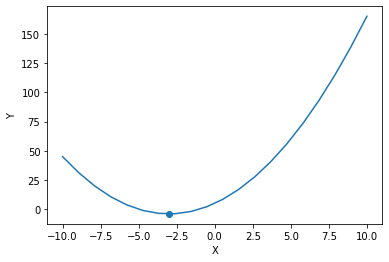

In [ ]:
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 20)
y = list(map(F(3,4), x))

plt.plot(x, y)
plt.ylabel("Y")
plt.xlabel("X")

plt.scatter([-3], [F(3,4)(-3)])

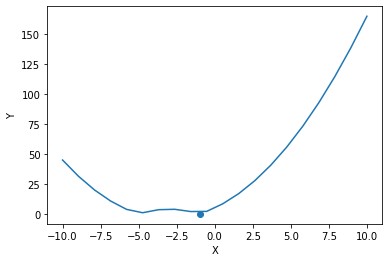

In [ ]:
x = np.linspace(-10, 10, 20)
y = list(map(G(3,4), x))

plt.plot(x, y)
plt.ylabel("Y")
plt.xlabel("X")

plt.scatter([-1], [G(3,4)(-1)])

# Задание 5

1000 человек бросают монетку. Каждый бросил 10 раз подряд.

 1. Какова вероятность того, что хотя бы у одного человека монетка выпала 10 раз подряд той же самой сторой (орлом или решкой)? 
 2. Какова вероятность того, что хотя бы у одного человека монетка выпала 8 раз подряд той же самой сторой (орлом или решкой)? 
 3. Какова вероятность того, что ровно у троих человек из 1000 монетка выпала 10 раз подряд той же самой сторой (орлом или решкой)?

In [ ]:
# 1. 
# P - выпадет орел или решка 10 раз подряд хотя бы раз из 1000
# p - выпадет орел или решка 10 раз подряд

def C(n, k):
  return np.math.factorial(n) / (np.math.factorial(n-k) * np.math.factorial(k))

p = (1/2**10)*2
q = 1 - p

P = 0

for i in range(1, 1001):
  P += C(1000, i) * p**i * q**(1000-i)

print(P)

0.8584404547322421


In [ ]:
# 2.
# P - выпадет орел или решка 8 раз подряд хотя бы раз из 1000
# p - выпадет орел или решка 8 раз подряд

p = 1/2**8 * (1/2)**2 * 2 * 2
q = 1 - p

P = 0

for i in range(1, 1001):
  P += C(1000, i) * p**i * q**(1000-i)

print(P)

0.980037491130566


In [ ]:
# 3. 
# P - выпадет орел или решка 10 раз подряд ровно у 3
# p - выпадет орел или решка 10 раз подряд

p = (1/2**10)*2
q = 1 - p

P = C(1000, 3) * p**3 * q**(997)
  

print(P)

0.1762873858121736
